## Исследование данных о российском кинопрокате



Наша основная задача в данном исследовании - изучить рынок российского кинопроката и выявить текущие тренды. Особое внимание уделим фильмам, которые получили государственную поддержку. Мы проанализируем данные фильмы и  ответим на вопрос: насколько такие фильмы интересны зрителю?
Для начала изучим предложенный датасет и обработаем его при необходимости. Затем исследуем данные для ответа на основной вопрос.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [369]:
try:
    df = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    df = pd.read_csv('/datasets/mkrf_movies.csv')
    
try:
    data = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data = pd.read_csv('/datasets/mkrf_shows.csv')   


смотрим первые 5 строк каждого датасета, определяемся по какому столбцу их возможно объединить

In [370]:
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [371]:
df.shape


(7486, 15)

In [372]:
data.head(5)

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790


In [373]:
df.shape

(7486, 15)

изучим общую информацию о датасете df и типах данных

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

до корректного слияния таблиц, необходима смена типа данных в общей колонке для обоих таблиц puNumber. 

изучим общую информацию о датасете data и типах данных

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


изменяем тип данных на int

In [376]:
df.loc[df['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
#поскольку строчка одна - удалим ее, т к на качестве данных это никак не отразится

df = df.loc[df['puNumber'] != 'нет']

In [378]:
 df['puNumber'] = df['puNumber'].astype('int')

теперь тип данных верный, а значит/, можно сливать таблицы по данному столбцу

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [380]:
df = df.merge(data, on = 'puNumber', how='outer')
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


после мержа удостоверимся в том, что таблицы слились и добавилась колонка box_office.

In [381]:
df.shape

(7485, 16)

In [382]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

было 15 столбцов - стало 16, также видим, что в итоговый датасет столбцы добавились.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

смена типа данных необходима для других колонок: show_start_date --> datetime, ratings --> float64. Попробовал сразу в столбце 'ratings' перевести тип данных в float64 - не получилось. Будем разбираться в чем дело. Для начала, посмотрим на характер данных, содержащихся в столбце: выведем уникальные значения.

In [383]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

теперь все понятно: столбец содержит ошибки: данные с %. Их будем убирать + необходимо уменьшить порядок цифр, путем деления данных с % на 10

In [384]:
df['ratings'] = df['ratings'].replace('\%', '', regex = True)
df['ratings']= df['ratings'].astype('float64') 
df.loc[df['ratings'] > 10, 'ratings'] = df['ratings']/10

In [385]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [386]:
df.loc[(df['ratings'] == 8. ), 'ratings'] = 8.0


убеждаемся, что наш код сработал: все в порядке - двигаеся далее

In [387]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'],format='%Y-%m-%dT%H:%M:%S')

In [388]:
display (df['show_start_date'].head(3))

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

визуализируем % пропусков в датафрейме df

In [390]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


видим, что в части колонок пропусков в % довольно много. Будем с ними разбираться последовательно.

In [391]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

начнем со столбца film_studio - посмотрим на данные пропуски в таблице датафрейма

In [392]:
df.loc[df['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.300,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.000
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.900,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


поскольку мы имеем дело с фильмами и информация носит открытый характер - для заполнения пропусков обратимся к интернету. В таблице ниже видно, что многие фильмы режиссированы/сняты/смонтированы одним и тем же лицом.  

In [393]:
df.loc[1293, 'film_studio'] = '7 разных студий'

In [394]:
df.loc[4440, 'film_studio'] = 'Пространство идей'

In [395]:
df.loc[6104, 'film_studio'] = 'Домашняя студия'

In [396]:
df.loc[6180, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'

In [397]:
df.loc[6378, 'film_studio'] = 'Домашняя студия'

In [398]:
df.loc[6379, 'film_studio'] = 'Домашняя студия'

In [399]:
df.loc[6398, 'film_studio'] = 'Домашняя студия'

In [400]:
df.loc[6484, 'film_studio'] = 'Домашняя студия'

In [401]:
df.loc[6493, 'film_studio'] = 'Домашняя студия'

In [402]:
df.loc[6496, 'film_studio'] = 'Домашняя студия'

In [403]:
df.loc[6497, 'film_studio'] = 'Домашняя студия'

In [404]:
df.loc[6498, 'film_studio'] = 'Домашняя студия'

In [405]:
df.loc[6506, 'film_studio'] = 'Домашняя студия'

In [406]:
df.loc[6510, 'film_studio'] = 'Домашняя студия'

In [407]:
df.loc[6637, 'film_studio'] = 'Домашняя студия'

In [408]:
df.loc[6638, 'film_studio'] = 'Домашняя студия'

In [409]:
df.loc[6661, 'film_studio'] = 'Домашняя студия'

In [410]:
df.loc[6721, 'film_studio'] = 'Домашняя студия'

возможно, это выпускные проекты студентов ВГИКа и скорее всего, это малобюджетные фильмы

In [411]:
df.loc[df['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.200,"детский,комедия",194527.000
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN


видим, что оба фильма российского производства => заполним страну производства на "Россия"

In [412]:
df.loc[3185, 'production_country'] = 'Россия'

In [413]:
df.loc[4440, 'production_country'] = 'Россия'

In [414]:
df.loc[df['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.000
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.900,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.700,"концерт,музыка",NaN


пропусков немного - обратимся к информации из открытых источников и вставим пропуски

In [415]:
df.loc[764, 'director'] = 'Вальдбюне Театр'
df.loc[1735, 'director'] = 'Творческий коллектив Британского музея'
df.loc[3839, 'director'] = 'Вера Строева'
df.loc[4051, 'director'] = 'Кристиан Тееде'
df.loc[4297, 'director'] = 'Музыкальный концерт'
df.loc[4414, 'director'] = 'Музыкальный концерт'
df.loc[4440, 'director'] = 'Василий Пичул, Юрий Владовский'
df.loc[4922, 'director'] = 'Стивен Клеобери'
df.loc[4941, 'director'] = 'Блу Лич'

перепроверим, ушли ли пропуски

In [416]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

согласно описанию проекта, 'Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку'. Другими словами, поскольку в этом столбце имеются пропуски, это означает, что данные фильмы не профинансированы государством. А т к кол-во пропусков у неск столбцов: refundable_support, nonrefundable_support, budget, financing_source одинаковое, заполнять их не надо, поскольку государственной поддержки данных фильмов нет.

Теперь определимся что делать с пропусками из столбцов: producer(8%), ratings (13%), genres (13%). По-хорошему, их необходимо брать из интернета и заполнять вручную. Т к эта информация находится в открытом доступе и ее можно восстановить. Здесь надо исходить их конкретной цели исследования и ясно понимать: насколько критичны пропуски в этих столбцах, для ответа на вопрос исследования. Так, указанные столбцы не помогут нам ответить на вопросы, стоящие в  исследовании, а заполнение их вручную - слишком трудозатратно, предлагаю на данном этапе оставить все, как есть.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

переходим к поиску дубликатов. Для начала изучим датафрейм на явные дубликаты

In [417]:
df.duplicated().sum()

0

больше всего на качестве исследования отразятся дубликаты в номере прокатного удостоверения. И Сразу изучим данный вопрос

In [418]:
df['puNumber'].duplicated().sum()

2

In [419]:
display(df[df.duplicated(['puNumber'])])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


выведем отдельно фильмы по каждому типу дубликата прокатного удостоверения

In [420]:
df.loc[df['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.000,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN


In [421]:
df.loc[df['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.400,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


мы видим, что повторяющихся дублей нет: под одним прокатным удостоверением выходило несколько фильмов.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

исследуем уникальные значения столбца type

In [422]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [423]:
df['type'].value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

мы визуализировали пропуски в начале строк столбца 'type'. И видим, что значения с пропусками воспринимаются, как отдельный вид значений. В основном, в типе "Художественный". Теперь наша задача - убрать их. 

In [424]:
df['type'] = df['type'].str.strip()

In [425]:
df['type'].value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

пропуски устранены - все в порядке. Исследуем другие категориальные столбцы.

In [426]:
for i in ['age_restriction', 'financing_source', 'genres']:
    display(df[i].unique())
    display(df[i].value_counts())
    

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

драма                               476
комедия                             352
мелодрама,комедия                   222
драма,мелодрама,комедия             189
драма,мелодрама                     183
                                   ... 
комедия,музыка,драма                  1
драма,фантастика,ужасы                1
приключения,детектив,семейный         1
мультфильм,мелодрама,приключения      1
документальный,драма,биография        1
Name: genres, Length: 742, dtype: int64

исследовав столбцы 'age_restriction', 'financing_source' и 'genres' пришел к следующим выводам: 

'age_restriction' - в датасете указано 5 категорий продукции, согласно возрастному нармированию. По значениям вопросов нет.

'financing_source' - источников финансорования в датасете Министерства Культуры ууказано очень малое количество. Причины неизвестны. Данные значения восполнить не представляется возможным.

'genres' - подавляющее большинство кинопродукции относится к жанрам драма (476), комедия (352), мелодрама (222). Однако большая часть фильмов относятся к смешанным жанрам. Пока просто имеем это ввиду.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



изучим столбцы 'refundable_support', 'nonrefundable_support', 'budget', 'box_office'на предмет уникальных значений, с целью выявления проблем с данными

In [427]:
df['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

In [428]:
df['nonrefundable_support'].unique()

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07, 3.00000000e+07, 4.00000000e+07,
       2.30000000e+07, 4.50000000e+07, 5.65790550e+07, 2.55000000e+07,
       2.75100000e+07, 1.00000000e+07, 2.40000000e+07, 2.45000000e+07,
       2.70000000e+07, 5.00000000e+06, 9.00000000e+07, 2.00000000e+07,
       7.00000000e+07, 9.70000000e+07, 2.44500000e+07, 5.00000000e+07,
       0.00000000e+00, 6.00000000e+07, 2.75000000e+07, 2.69500000e+07,
       1.10000000e+08, 1.50000000e+07, 5.90000000e+07, 2.50000000e+08,
       3.70000000e+07, 3.50000000e+07, 2.01452850e+07, 2.59000000e+07,
       6.00000000e+06, 3.92104482e+08, 2.52000000e+07, 2.29040000e+07,
       2.90000000e+07, 5.10000000e+07, 4.70000000e+06, 5.30000000e+06,
       2.17000000e+07, 2.49860000e+07, 2.53450000e+07, 1.33000000e+08,
       1.75000000e+08, 3.01239150e+07, 2.85000000e+07, 3.00000000e+08,
      

In [429]:
df['budget'].unique()

array([           nan, 7.94119000e+07, 3.71428570e+07, 1.76023490e+08,
       4.05741400e+07, 4.00151220e+07, 5.18500000e+07, 2.20588394e+08,
       8.62100670e+07, 1.39551503e+08, 4.85714300e+07, 8.00000000e+07,
       3.62595000e+07, 7.08761720e+07, 2.52489571e+08, 7.49100000e+07,
       0.00000000e+00, 8.97823120e+07, 4.36437176e+08, 4.05000000e+07,
       6.84906060e+07, 4.50066090e+07, 1.31000000e+08, 5.00000000e+08,
       6.10114070e+07, 4.00000000e+07, 3.73712620e+07, 3.52969500e+07,
       4.30000000e+07, 7.74017510e+07, 3.50000000e+07, 5.11967110e+07,
       9.01200000e+07, 2.67288892e+08, 4.92804960e+07, 4.90714280e+07,
       4.69688830e+07, 5.51950000e+07, 1.56360666e+08, 3.74247960e+07,
       3.57600600e+07, 2.81155800e+07, 3.79436520e+07, 1.38325738e+08,
       4.22525090e+07, 3.99900000e+07, 1.12000000e+08, 5.57294240e+07,
       3.57142860e+07, 1.39357211e+08, 5.02187410e+07, 4.02650000e+07,
       3.90579710e+07, 9.25000000e+07, 4.14978600e+07, 8.62363940e+07,
      

In [430]:
df['box_office'].unique()

array([           nan, 2.70000000e+03, 3.60000000e+02, 4.20000000e+02,
       3.80000000e+02, 1.16500000e+03, 2.26600000e+04, 8.47200000e+04,
       1.79500000e+03, 3.00000000e+02, 6.75000000e+04, 0.00000000e+00,
       1.85000000e+03, 2.00000000e+02, 3.04000000e+03, 2.26000000e+03,
       2.89000000e+03, 1.97464500e+05, 3.96800000e+04, 5.00000000e+03,
       7.59526000e+05, 1.09381000e+06, 1.12530200e+06, 1.94876000e+06,
       4.80800000e+03, 8.43310000e+05, 1.02940000e+05, 1.30000000e+03,
       3.37000000e+03, 4.00000000e+01, 1.19600000e+04, 1.65000000e+02,
       1.00000000e+02, 1.52500000e+03, 5.20000000e+02, 2.06000000e+03,
       1.46500000e+04, 5.50000000e+02, 3.59450000e+04, 2.49000000e+03,
       4.60000000e+02, 1.50000000e+02, 8.64000000e+03, 4.05000000e+02,
       7.80000000e+03, 1.90000000e+03, 1.86000000e+04, 1.82500000e+03,
       1.02000000e+03, 2.81500000e+04, 3.27000000e+03, 1.14900000e+03,
       2.40000000e+03, 8.80000000e+02, 4.25000000e+02, 1.40000000e+03,
      

мы видим, что финансовая информация представлена в экспоненциальном виде. В целом, пока вопросов к  данным не возникает. Нас интересуют эти 4 столюца с точки зрения получения статистической финансовой информации. Переведем данные из экспоненциального формата в обычный и изучим описательные статистики.

In [431]:
gp = ['refundable_support', 'nonrefundable_support',  'budget', 'box_office']
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[gp].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.000,332.000,332.000,3158.000
mean,11864457.831,48980988.892,127229716.684,76478696.161
std,24916555.264,59980117.923,188588333.115,240353122.823
min,0.000,0.000,0.000,0.000
25%,0.000,25000000.000,42000000.000,86239.000
50%,0.000,30000000.000,68649916.000,2327987.550
75%,15000000.000,40375000.000,141985319.500,23979671.025
max,180000000.000,400000000.000,2305074303.000,3073568690.790


попытаемся найти взаимсвязи в данных

In [432]:
df[gp].corr()

,refundable_support,nonrefundable_support,budget,box_office
refundable_support,1.000,0.360,0.641,0.312
nonrefundable_support,0.360,1.000,0.594,0.456
budget,0.641,0.594,1.000,0.361
box_office,0.312,0.456,0.361,1.000


мы обнаружили, что у части фильмов бюджет равен нулю - такого быть не может. В РФ многие фильмы выпускаются за государственный счет. При этом, для части фильмов поддержка является возвратной, для меньшей части - невозвратной, как вклад в культуру. Возвратная поддержка означает, что после проката фильма, студия обязана вернуть деньги государтсву. Невозвратная поддержка подразумевает, что студия не берет на себя никаких финансовых обязательств, кроме как создать фильм. Попробуем разобраться в цифрах. 

сгруппируем фильмы по названию, с колонками 'nonrefundable_support','refundable_support','budget', со значениями бюджета фильма

In [433]:
df.pivot_table(index= 'title', values = ['nonrefundable_support','refundable_support','budget']).sort_values(by='budget').head(20)

,budget,nonrefundable_support,refundable_support
title,,,
Чудо-юдо,0.000,20000000.000,20000000.000
Дуxless 2,0.000,75000000.000,0.000
Бармен.,0.000,0.000,20000000.000
Большое путешествие,0.000,120000000.000,60000000.000
Савва. Сердце воина,0.000,100000000.000,60000000.000
Селфи,0.000,40000000.000,20000000.000
Баба Яга,0.000,138969465.000,0.000
Помню - не помню!,0.000,6000000.000,0.000
Два хвоста,0.000,60000000.000,10000000.000


мы видим некорректность представленных данных, т к по части фильмов бюджет = 0, а поддержка есть. Встает вопрос о методике подсчета бюджета: считается ли господдержка частью бюджета фильма? В целом, данный вопрос в реальном проекте необходимо задать к Заказчику. Тем не менее, попробуем изучить данную категорию фильмов - их всего 17. Отфильтруем их средствами логической индексации и попробуем найти что то общее.

In [434]:
df.loc[df['budget'] == 0.00]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,23000000.000,0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,10234016.100
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,75000000.000,0.000,Фонд кино,6.600,драма,446163511.000
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000,70000000.000,0.000,Фонд кино,7.800,"боевик,драма,криминал",196572438.400
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.000,0.000,0.000,Фонд кино,6.200,"комедия,фэнтези",67418974.800
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези",184487551.400
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,59000000.000,0.000,Фонд кино,6.300,"комедия,драма",1957738.510
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,35000000.000,0.000,Фонд кино,5.100,"комедия,мелодрама",72937783.200
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,6000000.000,0.000,Министерство культуры,4.300,комедия,15362931.430
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000,51000000.000,0.000,Фонд кино,6.300,"комедия,мелодрама",70299052.000
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,250000000.000,0.000,Фонд кино,5.600,фантастика,1038321489.000


при первом взгляде, найти что то общее в фильмах с "нулевым" бюджетом не удалось. Вероятнее всего, проблема лежит на уровне внесения данных в датасет. Заполнить эти значения невозможно, т к каждый фильм имеет свои сугубо индивидуальный бюджет.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

создадим столбец - выведем его на экран

In [435]:
df['show_start_year'] = df['show_start_date'].dt.year
df['show_start_year']

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7480    2019
7481    2019
7482    2019
7483    2019
7484    2019
Name: show_start_year, Length: 7485, dtype: int64

проверяем какие столбцы в датасете

In [436]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office',
       'show_start_year'],
      dtype='object')

создадим новые столбцы

In [437]:
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский, В.Усков',
       'М.Чиаурели', 'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев',
       'В.Азаров', 'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников',
       'Джонатан Кинг', 'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит',
       'Крис Нунан', 'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон',
       'Р.Быков', 'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е.Ташков',
       'Н.Михалков', 'Ю.Карасик', 'А.Тарковский', 'Джон Франкенхаймер',
       'Оливье Маршал', 'С.Соловьев', 'Иоахим Реннинг, Эспен Сандберг',
       'Ролан Быков', 'Семен Туманов', 'Питер Сигал', 'М.Ромм',
       'Г.Полока', 'Ю.Райзман', 'Дрю Дэйуолт, Дэвид Шнейдер',
       'С.Самсонов', 'Айрон Блейз, Роберт Уокер', 'К.Шахн

In [438]:
df['director_first'] = df['director'].str.split(",").str[0]

In [439]:
df['director_first'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский', 'М.Чиаурели',
       'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев', 'В.Азаров',
       'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников', 'Джонатан Кинг',
       'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит', 'Крис Нунан',
       'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон', 'Р.Быков',
       'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е.Ташков', 'Н.Михалков',
       'Ю.Карасик', 'А.Тарковский', 'Джон Франкенхаймер', 'Оливье Маршал',
       'С.Соловьев', 'Иоахим Реннинг', 'Ролан Быков', 'Семен Туманов',
       'Питер Сигал', 'М.Ромм', 'Г.Полока', 'Ю.Райзман', 'Дрю Дэйуолт',
       'С.Самсонов', 'Айрон Блейз', 'К.Шахназаров', 'И.Гостев',
       'Т.Лукашевич', 'В.Павлович', 'Эми

в столбце 'direcror', обнаружено несколько аномалий - устраним их в ручную

In [440]:
df.loc[df['director_first'] == 'Ронан Чапалайн и Паскаль Вьонг; Фрэнсис Верзеймер; Джези Кулар и Даниэль Кюнт; Дидье Гросджин  ']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first
5277,Внеклассные занятия в 3D (Монстры из бездны; Я...,126000611,2011-03-25 12:00:00+00:00,Прочие,Эль Эм Дэ Продюксьон,Франция,Ронан Чапалайн и Паскаль Вьонг; Фрэнсис Верзей...,Эль Эм Дэ Продюксьон,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Ронан Чапалайн и Паскаль Вьонг; Фрэнсис Верзей...


In [441]:
df.loc[5277, 'director_first'] = 'Ронан Чапалайн и Паскаль Вьонг'

In [442]:
df.loc[df['director_first'] == 'Кристофер Карр. Хореография Мариуса Петипа. Постановка Моники Мейсон и Кристофера Ньютона по Нинетт де Валуа и Николаю Сергееву ']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first
1580,Петр Ильич Чайковский. Спящая красавица /По сю...,126001114,2014-04-11 12:00:00+00:00,Прочие,Артс Альянс Медиа,Великобритания,Кристофер Карр. Хореография Мариуса Петипа. По...,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,Кристофер Карр. Хореография Мариуса Петипа. По...


In [443]:
df[1580, 'director_first'] = 'Кристофер Карр'

In [444]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [445]:
df['genre_first'] = df['genres'].str.split(",").str[0]

In [446]:
df['genre_first']

0           боевик
1            драма
2       фантастика
3       фантастика
4       фантастика
           ...    
7480           NaN
7481        боевик
7482           NaN
7483           NaN
7484       комедия
Name: genre_first, Length: 7485, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [447]:
df['ratio_help_to_budget'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']*100

In [448]:
df['ratio_help_to_budget'] = df['ratio_help_to_budget'].map('{:,.2f}'.format)

In [449]:
df['ratio_help_to_budget'].unique()

array(['nan', '33.37', '70.00', '61.27', '69.01', '62.48', '48.22',
       '68.00', '53.94', '53.74', '68.95', '35.27', '27.72', '37.38',
       'inf', '50.12', '12.96', '62.96', '65.70', '66.66', '21.00',
       '12.00', '40.98', '25.00', '66.90', '67.99', '69.77', '38.76',
       '52.74', '22.19', '33.67', '68.99', '69.29', '42.58', '36.24',
       '62.04', '65.33', '69.91', '17.78', '69.84', '36.15', '66.27',
       '67.52', '66.39', '43.05', '68.30', '69.00', '32.43', '60.24',
       '63.78', '62.25', '62.46', '29.92', '69.50', '64.97', '55.56',
       '36.76', '68.72', '62.29', '69.44', '48.23', '67.12', '36.10',
       '34.07', '66.67', '62.59', '59.32', '37.31', '59.23', '16.99',
       '59.53', '43.49', '54.00', '64.10', '35.14', '43.33', '67.15',
       '33.05', '69.59', '66.51', '64.94', '52.67', '36.89', '65.45',
       '33.85', '50.08', '67.66', '64.99', '48.35', '51.38', '10.02',
       '65.50', '65.00', '65.88', '63.16', '52.72', '22.31', '22.93',
       '44.31', '50.83',

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [450]:
df.pivot_table(index= 'show_start_year', values = ['title','box_office'], aggfunc='count').sort_values(by='show_start_year')

,box_office,title
show_start_year,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,279,806
2015,465,705
2016,526,818
2017,357,505
2018,475,891


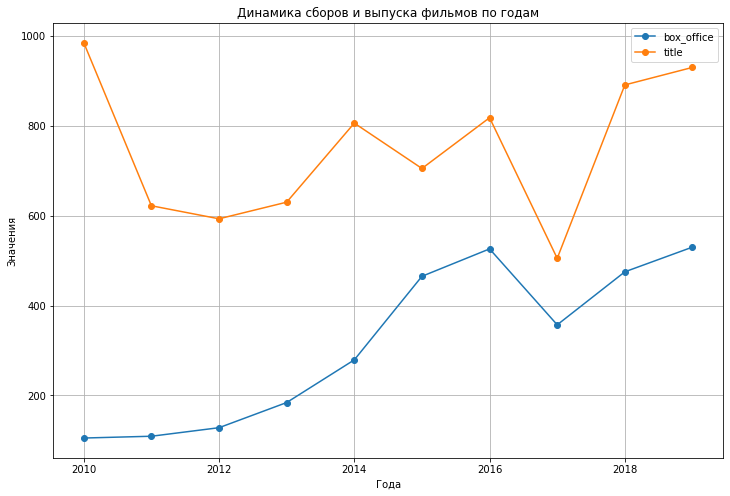

In [451]:
(
    df.pivot_table(index= 'show_start_year', values = ['title','box_office'], aggfunc='count')
    .sort_values(by='show_start_year')
    .plot(grid=True, style='-o', figsize=(12, 8))
)
plt.title('Динамика сборов и выпуска фильмов по годам')
plt.xlabel('Года')
plt.ylabel('Значения')
plt.show()

изучим соотношение сборов за каждый фильм к кол-ву выпущенных фильмов по годам 

In [452]:

((df.groupby('show_start_year')['box_office'].count()/
  df.groupby('show_start_year')['title'].count())*100).sort_values(ascending=False).to_frame()

,0
show_start_year,
2017,70.693
2015,65.957
2016,64.303
2019,56.989
2018,53.311
2014,34.615
2013,29.206
2012,21.585
2011,17.524


начиная с 2010 по 2019 год, в целом, отмечается увеличение эффективности проката фильмов, как бизнеса. Т е сборы с единицы кинопродукции растут.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [453]:
df.groupby('show_start_year')['box_office'].agg('sum')

show_start_year
2010       2428654.000
2011      14102765.000
2012       6955423.000
2013      29799706.200
2014    7444951859.200
2015   39497365196.400
2016   47866299741.910
2017   48563707217.510
2018   49668403134.320
2019   48425708779.590
Name: box_office, dtype: float64

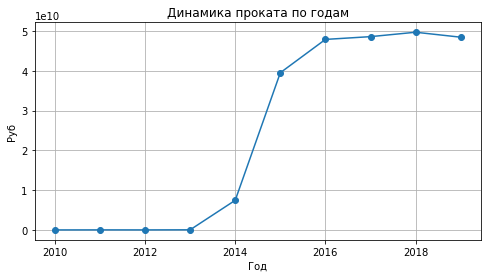

In [454]:
(
    df.groupby('show_start_year')['box_office']
    .agg('sum')
    .plot(grid=True, style='-o', figsize=(8, 4))
)
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Руб')
plt.show()

наибольшие сборы в исследуемом периоде удалось собрать в 2018 году - 49.7 млрд рублей (на графике экспоненцилаьная шкала). В целом, с 2010 г объем сборов увеличивается, пик роста пришелся на 2014 год.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [455]:
df.groupby('show_start_year')['box_office'].agg(['median','mean'])

,median,mean
show_start_year,,
2010,1700.000,23130.038
2011,3000.000,129383.165
2012,5660.000,54339.242
2013,3522.500,161954.925
2014,18160.000,26684415.266
2015,4920933.000,84940570.315
2016,3846679.410,91000569.852
2017,9968340.000,136032793.326
2018,8891102.210,104565059.230


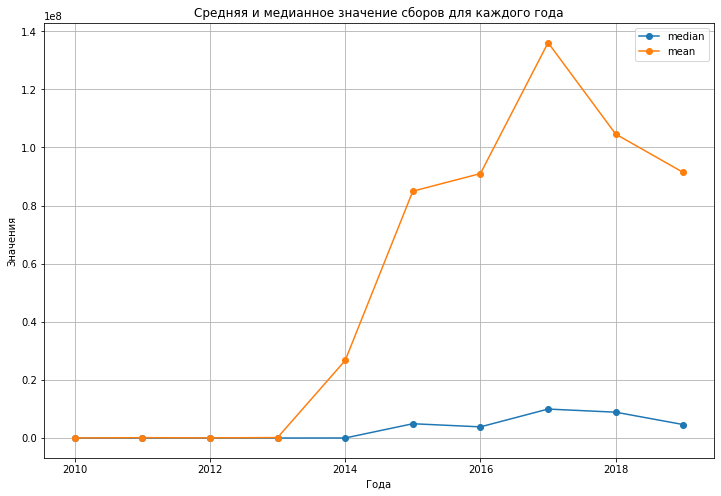

In [456]:
(df.groupby('show_start_year')['box_office'].agg(['median','mean']).plot(style='-o', grid=True, figsize=(12, 8)))
plt.title('Средняя и медианное значение сборов для каждого года')
plt.xlabel('Года')
plt.ylabel('Значения')
plt.show()

разницу среднего и медианного значения можно объяснить природой этих значенний: на среднее влияют выбросы, которые и обуcлавливают подобную картину. В целом, более репрезентатитвно отражает суть сборов медиана.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

отфильтруем значения таблицы, используя условия логической индексации

In [457]:
years = df[df['show_start_year'] >= 2015]['show_start_year']

df.pivot_table(index= years, columns = 'age_restriction',values='box_office')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015.000,9719348.163,186521671.355,67667386.133,41153851.268,164184893.800
2016.000,3664118.260,148834713.712,91563453.526,44992912.708,172187800.118
2017.000,76532976.667,191498235.626,154917709.918,65656432.524,268580936.572
2018.000,6489800.422,212944651.652,105792322.737,48939025.146,148602567.991
2019.000,5915355.607,149178809.102,71648421.262,55310362.315,158673440.134


In [458]:
df.pivot_table(index= years, columns = 'age_restriction',values='box_office')

,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
min,"3,664,118.26","148,834,713.71","67,667,386.13","41,153,851.27","148,602,567.99"
max,"76,532,976.67","212,944,651.65","154,917,709.92","65,656,432.52","268,580,936.57"


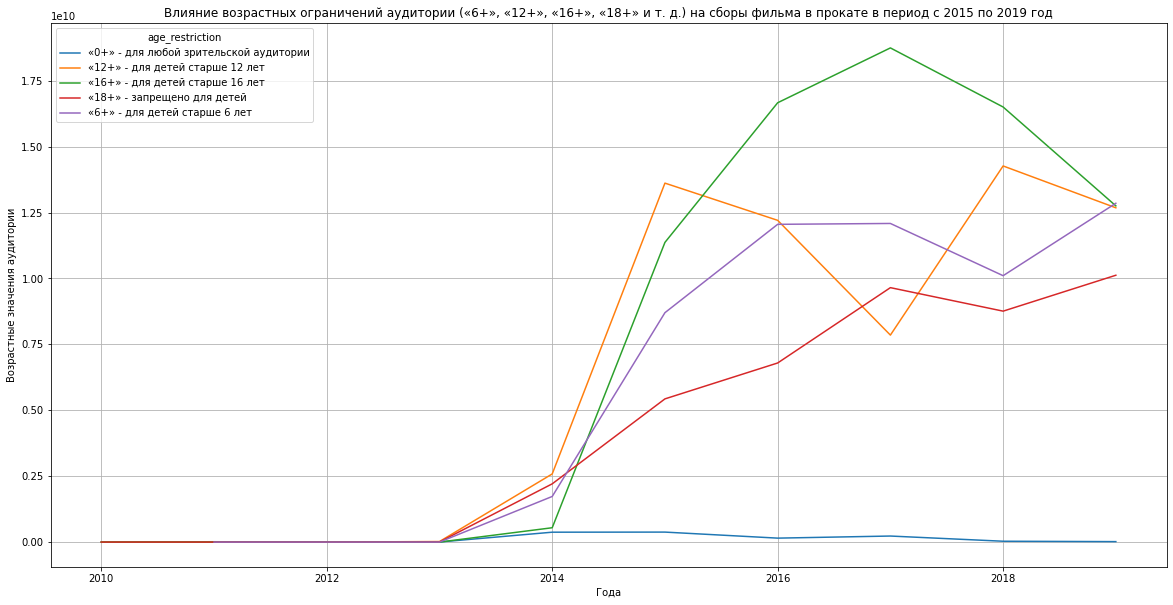

In [459]:
(
    df.pivot_table(index= years, columns = 'age_restriction',values='box_office')
    .apply (['min', 'max'])   
    .style.format("{:,.2f}")
)

In [ ]:
df.pivot_table(values="box_office", index= 'show_start_year', columns="age_restriction", aggfunc='sum')\
.plot(grid=True, figsize=(20, 10))
plt.title('Влияние возрастных ограничений аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год')
plt.xlabel('Года')
plt.ylabel('Возрастные значения аудитории')
plt.show()
              

для лучшей ивзуализации удалим данные до 2014 года через условия логической индексации

In [ ]:
df.loc[df['show_start_year'] > 2013].pivot_table(values="box_office", \
index= 'show_start_year', columns="age_restriction", aggfunc='sum').plot(grid=True, figsize=(20, 10))

График в целом получился большой, но суть его сводится к тому, что: влияния возрастных значений аудитории на сумму сбора в прокате нет.
При этом, за указанный период, наибольшая сумма сборов у фильмов 6+, наименьшая у фильмов 0+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

посчитаем сумму финансирования итого для государственной поддержки фильмов

In [ ]:
df['gov_help'] = df['refundable_support'] + df['nonrefundable_support']
df['gov_help'].sum()

итак, на 322 проекта выделено около 20 млрд рублей. Изучим, сколько денег в среднем дано на проект

In [465]:
df['gov_help'].value_counts()

count         332.000
mean     60845446.723
std      72755459.467
min       3000000.000
25%      25333750.000
50%      35000000.000
75%      60000000.000
max     500000000.000
Name: gov_help, dtype: float64

In [ ]:
df['gov_help'].describe()

т е в среднем, на проект выделяется сумма в 35 млн руб (медиана), но есть проекты, которые получили в 10 раз больше - 350 млн руб, 450 млн руб, 139 млн руб и таких проектов по одному. Именно эти проекты обусловили значимое смещение средней величины. Видимо, у данных проектов серьезное лобби ))). Далее, посмотрим, как господдержка изенялась по годам.

In [ ]:
(
    df.groupby('show_start_year')['gov_help']
    .agg(['median','mean'])
    .plot(style='-o', grid=True, figsize=(12, 8))
)
plt.title('Средняя и медианное значение гос. поддержки')
plt.xlabel('Года')
plt.ylabel('Млрд руб')
plt.show()

на имеющейся информации, изучим окупаемость фильмов с господдержкой. 

In [468]:
df.groupby('show_start_year')['gov_help'].sum()

show_start_year
2010     0
2011     0
2012     0
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: gov_help, dtype: int64

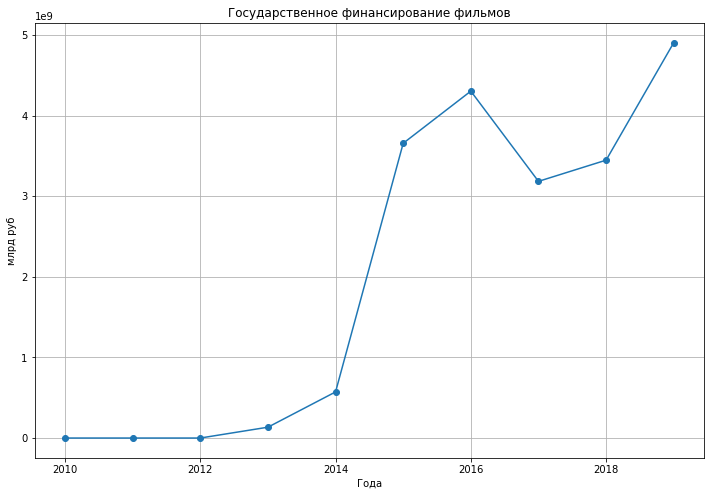

In [469]:
df.groupby('show_start_year')['gov_help'].count()

In [ ]:
df.groupby('show_start_year')['gov_help'].sum().plot(style='-o', grid=True, figsize=(12, 8))
plt.title('Государственное финансирование фильмов')
plt.xlabel('Года')
plt.ylabel('млрд руб')
plt.show()

из года в год, финансирование только растет, но фильмы окупаются слабо. Вопрос: кому все это надо? Ответ лежит в плоскости: субсидируемые фильмы - отличное место для расхищения государственных средств. ВИдимо DS нужен для Следственного Комитета )))
Изучим финансирование фильмов по жанрам

In [ ]:
genre_gov = df.groupby('genre_first')[['gov_help', 'ratings']].agg(['count', 'sum'])
genre_gov.sort_values(by='genre_first', ascending=True)

сразу становится понятно, что более всего финансируются драмы, комедии. А теперь изучим фильмы с максимальным и минимальным бюджетом

In [472]:
df['budget'].max()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,director_first,"(1580, director_first)",genre_first,ratio_help_to_budget,gov_help
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.000,...,Фонд кино,5.800,"приключения,фэнтези",333597059.590,2019,О.Степченко,Кристофер Карр,приключения,11.71,270000000.000


In [ ]:
df.loc[df['budget'] == 2305074303.0]

'Тайна печати дракона' - самый дорогой фильм в изучаемом периоде: судя по всему, вложения в "дружбу".
Далее, изучим на чью кокретно фильмы выделяет деньги государство ))

In [ ]:
df.pivot_table(index= 'director', values = ['gov_help']).sort_values(by='gov_help',ascending=False).head(10)

чудес не бывает: самый касоовый режисер тот, на кого больше всего тратят денег. 
И посмотрим по жанрам

In [ ]:
df.pivot_table(index= 'genre_first', values = ['gov_help']).sort_values(by='gov_help',ascending=False).head(10)

в целом, все соответствует политической целесообразности: исторические фильмы финансируются наибольшим объемом бюджетных средств

### Шаг 5. Напишите общий вывод

Нами проведена предобработка данных:

- В первой части работы мы подгрузили файлы с данными и объедините их в один датафрейм. Проверили типы данных в датафрейме и преобразовали там, где это необходимо. 
- Пропуски: У столбцов refundable_support, nonrefundable_support, budget, financing_source одинаковое количество пропусков 7153 (96%). Это означает, что в базе нет данных по финансированию внебюджетных обязательств. Пропуски в genres 975 (13%) и ratings 966 (13%). Взаимосвязи в пропусках найти не удалось. Заполнять, выделяя среднее по жанрам, нецелесообразно. В идеале нужно находить фильмы вручную на Кинопоиске и заносить данные. То же самое сделаем и с пропущенными значениями в столбце producer 568 (8%), но это слишком большая работа чтобы его заполнять вручную в рамках учебного проекта. В реальной жизни необходимо либо обратиться к заказчику с просьбой выполнить данную работу или увеличить бюджет на выполнение данной работы, если это влияет на точность результатов исследования.
- Дубликаты в данных: Дубликатов в данных не выявлено. Дубликаты в прокатных удостоверениях, как выяснилось в процессе работы, это нормально.
- Количественные значения: значения изучены. Корректно восстановить значения "refundable_support — объём возвратных средств государственной поддержки", "nonrefundable_support — объём невозвратных средств государственной поддержки", "budget — общий бюджет фильма", "box_office — сборы в рублях" не представляется возможным, т к у каждого фильма сови индивидуальные условия финансирования и использовать среднее/медианное значения для восстановления данных нельзя.
- Все необходимые столбцы созданы: столбец с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма. Создан отдельный столбец с долей от общего бюджета фильма составляющего государственную поддержку.

Проведен исследовательский анализ данных:
- Начиная с 2010 по 2019 год, в целом, отмечается увеличение эффективности проката фильмов, как бизнеса. Т е сборы с единицы кинопродукции растут.
- Наименьшая сумма сборов была в 2010 году, всего 2 428 654 р., наибольшая в 2018 г и составила 49 668 403 134 р.
- Влияния возрастных значений аудитории на сумму сбора в прокате нет.
При этом, за указанный период, наибольшая сумма сборов у фильмов 6+, наименьшая у фильмов 0+. 

Анализ фильмов с государственной поддержкой
- всего фильмов и иных проектов 332 шт.
- т е в среднем, на проект выделяется сумма в 35 млн руб (медиана), но есть проекты, которые получили в 10 раз больше - 350 млн руб, 450 млн руб, 139 млн руб и таких проектов по одному. Именно эти проекты обусловили значимое смещение средней величины.
- Самый дорогой фильм "Тайна печати дракона"
- Больше всего денег выделяют на фильмы Ф.Бондарчука и А.Кравчука
- Чаще всего выделяют деньги на исторические фильмы